In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer
import operator
import random
%matplotlib inline

In [38]:
# Importing the dataset uber ride reviews 

df = pd.read_csv(r'c:\Users\thelo\Downloads\Uber_Ride_Reviews.csv')

In [39]:
df.head()

,ride_review,ride_rating,sentiment
0,I completed running New York Marathon requeste...,1.0,0
1,My appointment time auto repairs required earl...,1.0,0
2,Whether I using Uber ride service Uber Eats or...,1.0,0
3,Why hard understand I trying retrieve Uber cab...,1.0,0
4,I South Beach FL I staying major hotel ordered...,1.0,0


In [40]:
df.tail()

,ride_review,ride_rating,sentiment
1339,everyone knows uber fast couple drinks night w...,2.0,0
1340,For service asks credit card number right bat ...,1.0,0
1341,great service hiring drivers know way around t...,2.0,0
1342,Uber several problems make poor experience con...,1.0,0
1343,Uber kind like magic You punch buttons app pho...,5.0,1


In [41]:
#shape of our data
df.shape

(1344, 3)

In [42]:
print(sum(df['sentiment']))

233


In [43]:
print(len(df['sentiment']))

1344


In [44]:
#baserate

print(sum(df['sentiment']) / len(df['sentiment'])*100)

17.336309523809522


In [45]:
df.describe()


,ride_rating,sentiment
count,1344.000000,1344.000000
mean,1.627232,0.173363
std,1.296149,0.378702
min,1.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
max,5.000000,1.000000


In [46]:
# So we have 5 unique values for feature ride_rating

df['ride_rating']. unique()

array([1., 2., 3., 4., 5.])

In [47]:
# Total 5 unique values for ride_rating


df['ride_rating']. nunique()

5

In [48]:
# So we have 2 unique values for our target variable sentiment

df['sentiment'].unique()

array([0, 1], dtype=int64)

In [49]:
# total 2 unique values for sentiment 

df['sentiment']. nunique()

2

In [50]:
# value counts for ride_rating feature

df['ride_rating']. value_counts()

1.0    1041
5.0     124
2.0      70
4.0      59
3.0      50
Name: ride_rating, dtype: int64

In [51]:
# value counts for sentiment

df['sentiment']. value_counts()

0    1111
1     233
Name: sentiment, dtype: int64

In [52]:
# To see if there is any null values
# You can see from the list we do not have any null values


null_count = df.isnull().sum()
null_count

ride_review    0
ride_rating    0
sentiment      0
dtype: int64

In [53]:
df.isnull()

,ride_review,ride_rating,sentiment
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1339,False,False,False
1340,False,False,False
1341,False,False,False
1342,False,False,False


In [54]:
groups_ride_rating = df.groupby('ride_rating').count()
groups_ride_rating

,ride_review,sentiment
ride_rating,,
1.0,1041,1041
2.0,70,70
3.0,50,50
4.0,59,59
5.0,124,124


In [55]:
groups_sentiment = df.groupby('sentiment').count()
groups_sentiment

,ride_review,ride_rating
sentiment,,
0,1111,1111
1,233,233


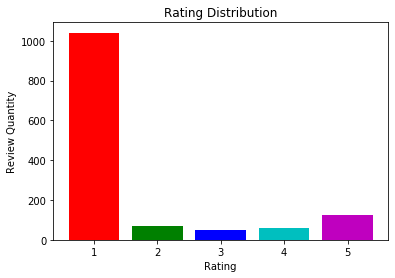

In [56]:
#seperating by groups
groups = df.groupby('ride_rating').count()
Values = groups.ride_review
colors = ['r', 'g', 'b', 'c', 'm']
#making bar plot
plt.bar(([1,2,3,4,5]), Values, color= colors)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Review Quantity')
plt.show()

In [57]:
df['binary_class'] = np.where(df['ride_rating'] > 3, 1, 0)
df

,ride_review,ride_rating,sentiment,binary_class
0,I completed running New York Marathon requeste...,1.0,0,0
1,My appointment time auto repairs required earl...,1.0,0,0
2,Whether I using Uber ride service Uber Eats or...,1.0,0,0
3,Why hard understand I trying retrieve Uber cab...,1.0,0,0
4,I South Beach FL I staying major hotel ordered...,1.0,0,0
...,...,...,...,...
1339,everyone knows uber fast couple drinks night w...,2.0,0,0
1340,For service asks credit card number right bat ...,1.0,0,0
1341,great service hiring drivers know way around t...,2.0,0,0
1342,Uber several problems make poor experience con...,1.0,0,0


In [58]:
values = df.groupby('binary_class').count()
values

,ride_review,ride_rating,sentiment
binary_class,,,
0,1161,1161,1161
1,183,183,183


In [59]:
X_text = df['ride_review']
Y = df['binary_class']

In [60]:
# Storing the Vectorizer in tf variable after fitting it to Ride Review feature

tfidf_vectorizer = TfidfVectorizer().fit(X_text)

# Calcuting the count of all the words in the Ride_Review Column

tf = tfidf_vectorizer.vocabulary_

In [62]:
#list of least occuring words from 1 - 5
sorted_asc = sorted(tf.items(), key=operator.itemgetter(0))
sorted_asc[:5]


[('aaa', 0), ('aapd', 1), ('abandoned', 2), ('abhi', 3), ('ability', 4)]

In [63]:
#list of most frequently occuring words from last
sorted_des = sorted(tf.items(), key=operator.itemgetter(0),reverse=True)
sorted_des[:5]

[('über', 7794),
 ('àsses', 7793),
 ('àssclowns', 7792),
 ('àss', 7791),
 ('zoomed', 7790)]

In [64]:
# Turn these tokens into a numeric matrix using tfIDF_vectorizer
X = tfidf_vectorizer.transform(X_text)
print (X.toarray())

# Create a Logistic Regression model
logistic_regression = LogisticRegression(solver='lbfgs', max_iter=1000)
logistic_regression.fit(X, Y)
# Use this model and our data to get 26-fold cross validation AUCs because it gave us the highest AUC
aucs = model_selection.cross_val_score(logistic_regression, X, Y, scoring="roc_auc", cv=26)
print('')

# Print out the average AUC rounded to three decimal points
print("Area under the ROC curve for our classifier is " + str(round(np.mean(aucs), 3)))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Area under the ROC curve for our classifier is 0.91


In [65]:
#accuracies of all the folds in Logistic Regression
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logistic_regression, X, Y, cv=26)
scores

array([0.86792453, 0.88461538, 0.86538462, 0.88461538, 0.86538462,
       0.88461538, 0.88461538, 0.86538462, 0.90384615, 0.86538462,
       0.88461538, 0.88461538, 0.88461538, 0.90384615, 0.88461538,
       0.86538462, 0.88461538, 0.8627451 , 0.8627451 , 0.8627451 ,
       0.8627451 , 0.8627451 , 0.8627451 , 0.8627451 , 0.88235294,
       0.8627451 ])

In [66]:
#Average accuracy of Logistic Regression
np.mean(scores)

0.874938157690228

In [67]:
# Create a vectorizer that will track text as binary features
tfidf_vectorizer = TfidfVectorizer().fit(X_text)

# Turn these tokens into a numeric matrix
X = tfidf_vectorizer.transform(X_text)
print (X.toarray())

# Create a naive bayes model
naive_bayes = BernoulliNB()

# Use this model and our data to get 26-fold cross validation AUCs
aucs = model_selection.cross_val_score(naive_bayes, X, Y, scoring="roc_auc", cv=26)
print('')

# Print out the average AUC rounded to three decimal points
print("Area under the ROC curve for our classifier is " + str(round(np.mean(aucs), 3)))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Area under the ROC curve for our classifier is 0.839


In [68]:
#accuracies of all the fold in Naive Bayes
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(naive_bayes, X, Y, cv=26)
scores1

array([0.8490566 , 0.86538462, 0.88461538, 0.84615385, 0.86538462,
       0.86538462, 0.86538462, 0.84615385, 0.88461538, 0.86538462,
       0.82692308, 0.86538462, 0.88461538, 0.82692308, 0.84615385,
       0.82692308, 0.88461538, 0.84313725, 0.82352941, 0.82352941,
       0.8627451 , 0.84313725, 0.88235294, 0.84313725, 0.84313725,
       0.80392157])

In [69]:
#Average accuracy of Logistic Regression
np.mean(scores1)

0.8526032328751529

In [70]:
#creating array variable of all the words
feature_names = np.array(tfidf_vectorizer.get_feature_names())
#creating array of all the regression coefficients per word
coef_index = logistic_regression.coef_[0]
#creating df with both arrays in it
df = pd.DataFrame({'Word':feature_names, 'Coef': coef_index})
#sorting by coefficient 

#Top 5 negatively correlated words
df.sort_values('Coef').head(5)

,Word,Coef
1070,charged,-1.985103
50,account,-1.350692
4490,never,-1.317207
983,card,-1.206661
1614,customer,-1.189967


In [71]:
# Top 5 positively correlated words
df.sort_values('Coef').tail(5)

,Word,Coef
1172,clean,1.652232
5908,safe,1.660328
1444,convenient,1.725031
7346,used,1.811399
2939,great,2.286404


In [89]:
##Test inputs reviews

print(logistic_regression.predict(tfidf_vectorizer.transform(['abandoned great'])))
print(logistic_regression.predict(tfidf_vectorizer.transform(['great she the best'])))
print(logistic_regression.predict(tfidf_vectorizer.transform(['charged slow horrible'])))

[0]
[1]
[0]
